In [2]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "./input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results  written to the current directory are saved as output.


Python version: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.3
matplotlib version: 3.0.2
NumPy version: 1.16.0
SciPy version: 1.0.0
IPython version: 6.1.0
scikit-learn version: 0.20.1
-------------------------
propublica-violent-recidivism.csv
propublica-violent-recidivism.xlsx



In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
#import data from file
data_raw = pd.read_csv('./input/propublica-violent-recidivism.csv')


#to play with our data we'll create a copy
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1]


#preview data
print (data_raw.info()) 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4743 non-null   int64  
 1   name                     4743 non-null   object 
 2   first                    4743 non-null   object 
 3   last                     4743 non-null   object 
 4   compas_screening_date    4743 non-null   object 
 5   sex                      4743 non-null   object 
 6   dob                      4743 non-null   object 
 7   age                      4743 non-null   int64  
 8   age_cat                  4743 non-null   object 
 9   race                     4743 non-null   object 
 10  juv_fel_count            4743 non-null   int64  
 11  decile_score             4743 non-null   int64  
 12  juv_misd_count           4743 non-null   int64  
 13  juv_other_count          4743 non-null   int64  
 14  priors_count            

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
1360,3033,julo victor,julo,victor,2013-03-11,Male,1984-09-22,31,25 - 45,Other,...,Low,2013-03-11,2015-08-05,2015-08-06,5,2,877,1,0,0
717,1625,deon jackson,deon,jackson,2013-02-19,Male,1994-10-31,21,Less than 25,African-American,...,High,2013-02-19,2013-04-11,2013-04-12,0,0,51,1,1,1
1125,2517,joel jasmin,joel,jasmin,2013-09-24,Male,1972-02-02,44,25 - 45,African-American,...,Low,2013-09-24,2013-12-06,2014-02-10,9,0,73,0,0,0
3775,8743,timothy kendrick,timothy,kendrick,2013-01-23,Male,1986-01-22,30,25 - 45,African-American,...,High,2013-01-23,2013-06-04,2013-06-05,8,0,132,1,1,1
1667,3741,sean fleming,sean,fleming,2014-01-07,Male,1980-03-30,36,25 - 45,African-American,...,Low,2014-01-07,2014-04-11,2014-04-22,15,1,94,0,0,0
777,1735,jeffrey dolgan,jeffrey,dolgan,2014-02-03,Male,1978-11-13,37,25 - 45,Caucasian,...,Low,2014-02-03,2014-02-03,2014-02-03,0,0,788,0,0,0
510,1159,rosalind townsend,rosalind,townsend,2013-09-23,Female,1963-03-28,53,Greater than 45,African-American,...,Low,2013-09-23,2013-09-23,2013-09-23,0,0,921,0,0,0
3167,7293,vincent gordon,vincent,gordon,2013-12-13,Male,1981-07-24,34,25 - 45,African-American,...,Low,2013-12-13,2013-12-12,2013-12-13,19,0,840,0,0,0
4456,10330,noel sequeira,noel,sequeira,2013-04-27,Male,1949-03-29,67,Greater than 45,Caucasian,...,Low,2013-04-27,2013-04-27,2013-06-08,0,42,1070,0,0,0
2170,4951,maria garcia,maria,garcia,2014-03-17,Female,1964-09-11,51,Greater than 45,Hispanic,...,Low,2014-03-17,2014-03-17,2014-03-17,2,0,746,0,0,0


In [5]:
features = [
    'sex',
    'age',
    'age_cat',
    'race',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
    'c_days_from_compas',
    'c_charge_degree',
    'c_charge_desc',
    'is_recid',
    'score_text',
    'v_score_text',
    'two_year_recid'
]
data1 = data1[features]

In [6]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)


data_raw.describe(include = 'all')

Train columns with null values:
 sex                    0
age                    0
age_cat                0
race                   0
juv_fel_count          0
decile_score           0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_days_from_compas    11
c_charge_degree        0
c_charge_desc         17
is_recid               0
score_text             5
v_score_text           0
two_year_recid         0
dtype: int64
----------


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743,4743,4743,4743,4743,4743,4743.000000,4743,4743,...,4743,4743,4534,4534,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
unique,NaN,4721,2114,2897,586,2,3978,NaN,3,6,...,3,586,1003,1012,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,james scott,michael,williams,2013-09-23,Male,1983-02-03,NaN,25 - 45,African-American,...,Low,2013-09-23,2014-01-04,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,95,49,24,3746,4,NaN,2699,2266,...,3389,24,19,27,NaN,NaN,NaN,NaN,NaN,NaN
mean,5454.230445,NaN,NaN,NaN,NaN,NaN,NaN,36.002952,NaN,NaN,...,NaN,NaN,NaN,NaN,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,3189.515451,NaN,NaN,NaN,NaN,NaN,NaN,12.200715,NaN,NaN,...,NaN,NaN,NaN,NaN,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2631.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,5475.000000,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,8239.500000,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000


In [7]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
data1['c_days_from_compas'].fillna(0, inplace = True)
#complete embarked with mode
data1['c_charge_desc'].fillna(data1['c_charge_desc'].mode()[0], inplace = True)
#complete missing fare with median
data1['score_text'].fillna(data1['score_text'].mode()[0], inplace = True)

# drop_column = ['id']
# data1.drop(drop_column,  axis=1, inplace=True)    

print(data1.isnull().sum())
print("-"*10)
    

sex                   0
age                   0
age_cat               0
race                  0
juv_fel_count         0
decile_score          0
juv_misd_count        0
juv_other_count       0
priors_count          0
c_days_from_compas    0
c_charge_degree       0
c_charge_desc         0
is_recid              0
score_text            0
v_score_text          0
two_year_recid        0
dtype: int64
----------


In [8]:
print (data1.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 4743 non-null   object 
 1   age                 4743 non-null   int64  
 2   age_cat             4743 non-null   object 
 3   race                4743 non-null   object 
 4   juv_fel_count       4743 non-null   int64  
 5   decile_score        4743 non-null   int64  
 6   juv_misd_count      4743 non-null   int64  
 7   juv_other_count     4743 non-null   int64  
 8   priors_count        4743 non-null   int64  
 9   c_days_from_compas  4743 non-null   float64
 10  c_charge_degree     4743 non-null   object 
 11  c_charge_desc       4743 non-null   object 
 12  is_recid            4743 non-null   int64  
 13  score_text          4743 non-null   object 
 14  v_score_text        4743 non-null   object 
 15  two_year_recid      4743 non-null   int64  
dtypes: flo

In [9]:
data1['c_charge_desc'].unique() 

array(['Aggravated Assault w/Firearm', 'Felony Battery w/Prior Convict',
       'Possession of Cannabis', 'arrest case no charge', 'Battery',
       'Insurance Fraud', 'Poss 3,4 MDMA (Ecstasy)',
       'Poss3,4 Methylenedioxymethcath', 'Grand Theft in the 3rd Degree',
       'Driving While License Revoked', 'Introduce Contraband Into Jail',
       'Susp Drivers Lic 1st Offense', 'Carrying Concealed Firearm',
       'Tampering With Physical Evidence', 'Operating W/O Valid License',
       'Possess Cannabis/20 Grams Or Less',
       'Unlaw Use False Name/Identity', 'Possession of Cocaine',
       'Uttering a Forged Instrument', 'DUI Level 0.15 Or Minor In Veh',
       'Attempt Armed Burglary Dwell', 'Unlaw LicTag/Sticker Attach',
       'Burglary Structure Unoccup', 'Poss Cocaine/Intent To Del/Sel',
       'Burglary Dwelling Assault/Batt', 'Felony Battery (Dom Strang)',
       'Pos Cannabis W/Intent Sel/Del', 'Flee/Elude LEO-Agg Flee Unsafe',
       'Fail To Redeliv Hire/Leas Prop', 'Agg

In [10]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
# label encoder mark the sample according to its order:
# for example: LabelEncoder.fit_transform([1, 1, 100, 67, 5]) will get ([0, 0, 3, 2, 1])
# NOTE: why using LabelEncoder() ?

# Sex: Male, Female => 0, 1
data1['sex_code'] = label.fit_transform(data1['sex'])
# age_cat (age category): 'Greater than 45', '25 - 45', 'Less than 25' => 1, 0, 2
data1['age_cat_code'] = label.fit_transform(data1['age_cat'])
# race: 'Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian', 'Native American
data1['race_code'] = label.fit_transform(data1['race'])
# c_charge_degree: 'F', 'M'
data1['c_charge_degree_code'] = label.fit_transform(data1['c_charge_degree'])
# c_charge_desc: 
data1['c_charge_desc_code'] = label.fit_transform(data1['c_charge_desc'])
data1['score_text_code'] = label.fit_transform(data1['score_text'])
data1['v_score_text_code'] = label.fit_transform(data1['v_score_text'])


#define y variable aka target/outcome
Target = ['two_year_recid']

#define x variables for original features aka feature selection
data1_x = features[:-1]
data1_x_calc = [
    'sex_code',
    'age',
    'age_cat_code',
    'race_code',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
    'c_days_from_compas',
    'c_charge_degree_code',
    'c_charge_desc_code',
    'is_recid',
    'score_text_code', 
    'v_score_text_code',
] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')



Original X Y:  ['two_year_recid', 'sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'score_text', 'v_score_text'] 



In [11]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

Train columns with null values: 
 sex                     0
age                     0
age_cat                 0
race                    0
juv_fel_count           0
decile_score            0
juv_misd_count          0
juv_other_count         0
priors_count            0
c_days_from_compas      0
c_charge_degree         0
c_charge_desc           0
is_recid                0
score_text              0
v_score_text            0
two_year_recid          0
sex_code                0
age_cat_code            0
race_code               0
c_charge_degree_code    0
c_charge_desc_code      0
score_text_code         0
v_score_text_code       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   4743 non-null   object 
 1   age                   4743 non-null   int64  
 2   age_cat               4743 n

In [12]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], test_size=0.25, random_state = 0)
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))
train1_x.head()

Data1 Shape: (4743, 23)
Train1 Shape: (3557, 15)
Test1 Shape: (1186, 15)


,sex_code,age,age_cat_code,race_code,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_days_from_compas,c_charge_degree_code,c_charge_desc_code,is_recid,score_text_code,v_score_text_code
2310,1,39,0,2,0,3,0,0,5,21.0,0,53,0,1,1
527,0,37,0,0,0,7,0,0,3,1.0,0,285,0,2,1
2948,1,55,1,2,0,2,0,0,1,17.0,1,34,0,1,1
2666,1,37,0,0,0,6,0,0,6,552.0,1,34,0,2,2
3862,1,27,0,0,0,4,0,0,1,1.0,0,20,1,1,2


In [13]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('two_year_recid Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

two_year_recid Correlation by: sex
      sex  two_year_recid
0  Female        0.098295
1    Male        0.180726
---------- 

two_year_recid Correlation by: age
    age  two_year_recid
0    18        1.000000
1    19        0.916667
2    20        0.354430
3    21        0.267380
4    22        0.197674
..  ...             ...
58   76        0.000000
59   77        0.250000
60   79        0.000000
61   80        0.000000
62   83        0.000000

[63 rows x 2 columns]
---------- 

two_year_recid Correlation by: age_cat
           age_cat  two_year_recid
0          25 - 45        0.177103
1  Greater than 45        0.074423
2     Less than 25        0.240000
---------- 

two_year_recid Correlation by: race
               race  two_year_recid
0  African-American        0.207855
1             Asian        0.148148
2         Caucasian        0.122869
3          Hispanic        0.115721
4   Native American        0.272727
5             Other        0.125000
---------- 

two_year_recid Correla

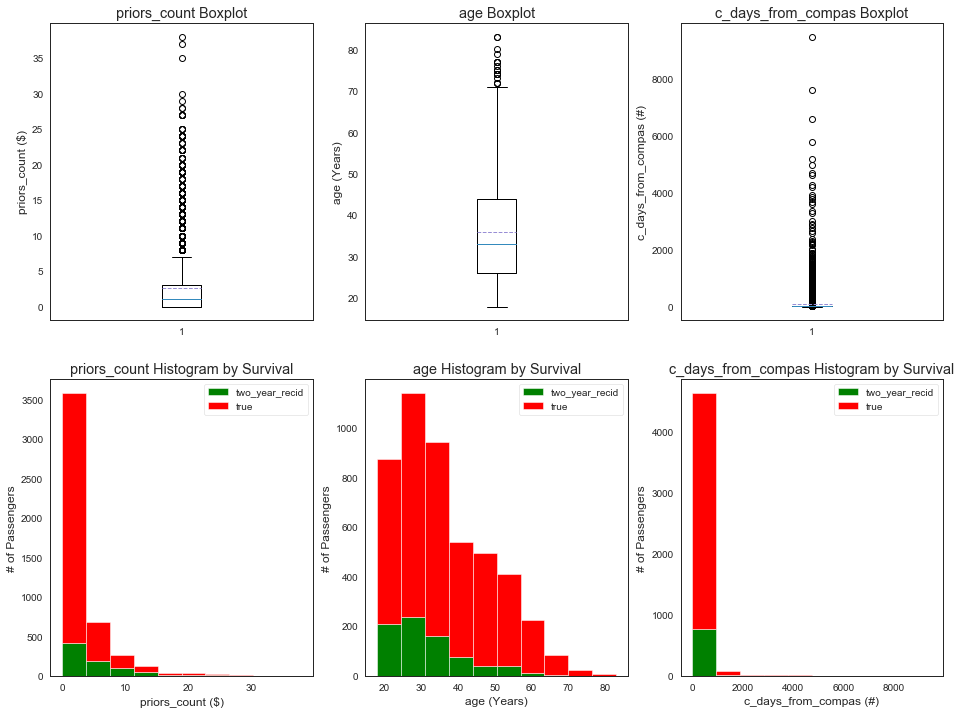

In [14]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['priors_count'], showmeans = True, meanline = True)
plt.title('priors_count Boxplot')
plt.ylabel('priors_count ($)')

plt.subplot(232)
plt.boxplot(data1['age'], showmeans = True, meanline = True)
plt.title('age Boxplot')
plt.ylabel('age (Years)')

plt.subplot(233)
plt.boxplot(data1['c_days_from_compas'], showmeans = True, meanline = True)
plt.title('c_days_from_compas Boxplot')
plt.ylabel('c_days_from_compas (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['two_year_recid']==1]['priors_count'], data1[data1['two_year_recid']==0]['priors_count']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('priors_count Histogram by Survival')
plt.xlabel('priors_count ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['two_year_recid']==1]['age'], data1[data1['two_year_recid']==0]['age']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('age Histogram by Survival')
plt.xlabel('age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['two_year_recid']==1]['c_days_from_compas'], data1[data1['two_year_recid']==0]['c_days_from_compas']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('c_days_from_compas Histogram by Survival')
plt.xlabel('c_days_from_compas (#)')
plt.ylabel('# of Passengers')
plt.legend()

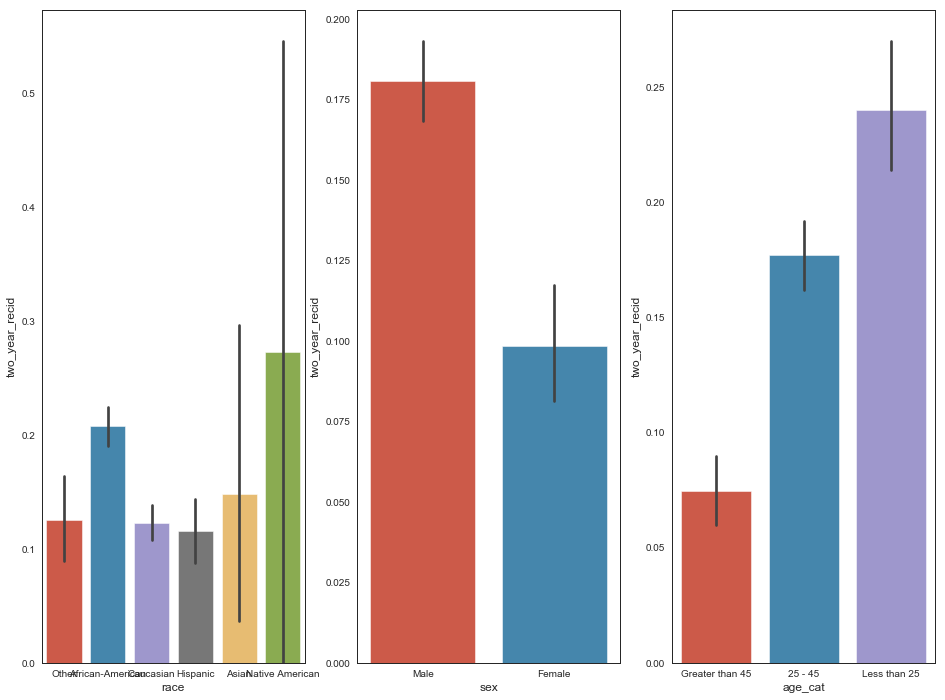

In [15]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3,figsize=(16,12))

sns.barplot(x = 'race', y = 'two_year_recid', data=data1, ax = axis1)
sns.barplot(x = 'sex', y = 'two_year_recid',  data=data1, ax = axis2)
sns.barplot(x = 'age_cat', y = 'two_year_recid', data=data1, ax = axis3)



Text(0.5, 1.0, 'sex vs score_text_code two_year_recid Comparison')

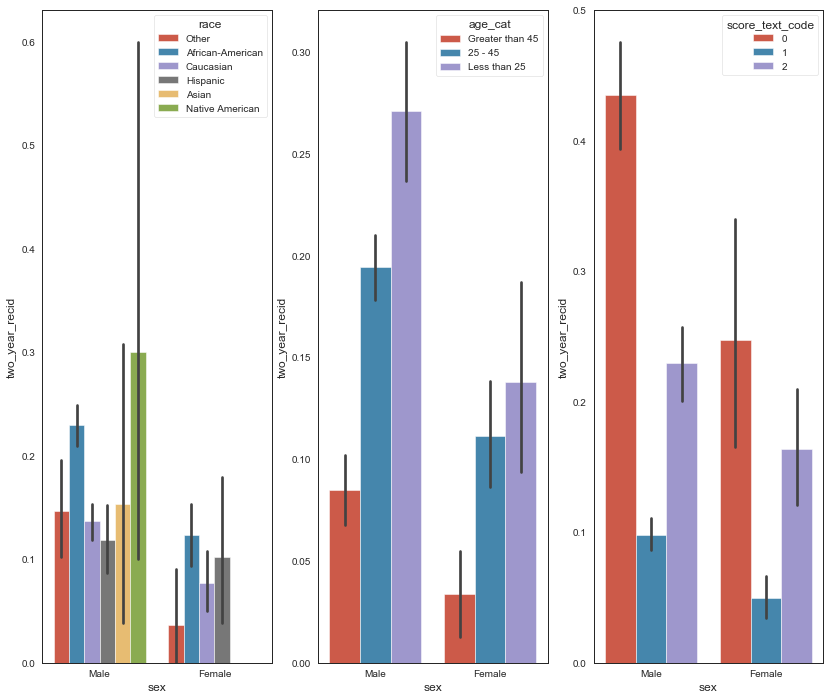

In [16]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'race', data=data1, ax = qaxis[0])
axis1.set_title('sex vs race two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'age_cat', data=data1, ax  = qaxis[1])
axis1.set_title('sex vs age_cat two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'score_text_code', data=data1, ax  = qaxis[2])
axis1.set_title('sex vs score_text_code two_year_recid Comparison')


In [17]:
# pp = sns.pairplot(data1, hue = 'two_year_recid', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

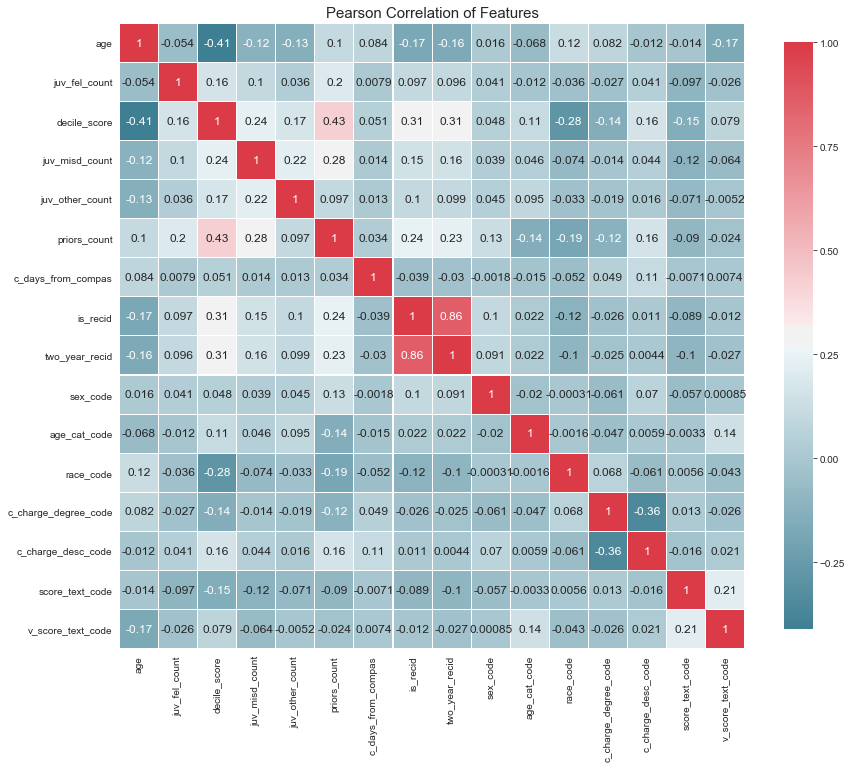

In [18]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [19]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), # prior is bernoulli
    naive_bayes.GaussianNB(),  # prior is gaussian
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_calc], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_calc], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_calc])
    
    row_index+=1

    
#print and sort table:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increas

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
1,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.953286,0.952987,0.0131134,1.71623
3,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.952091,0.952495,0.0128307,0.00448327
2,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.942285,0.942235,0.0172514,0.0049911
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.997364,0.93338,0.0220266,0.0296459
7,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.999895,0.924666,0.0293611,0.00718386
6,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.912162,0.912509,0.10825,0.245056
5,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.943128,0.838791,0.0257203,3.45961
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.867452,0.829445,0.0173093,0.00798135


Text(0, 0.5, 'Algorithm')

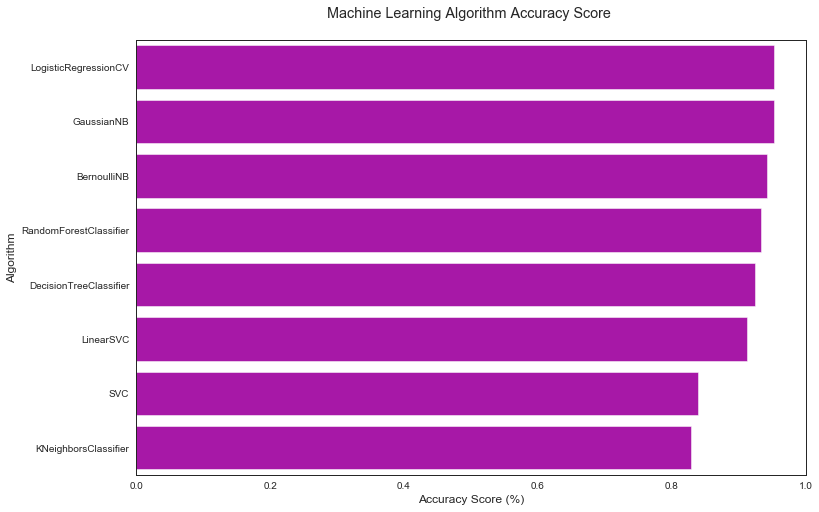

In [20]:

sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [20]:
MLA_predict

,two_year_recid,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,LinearSVC,DecisionTreeClassifier
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4738,0,0,0,0,0,0,0,0,0,0,0
4739,0,0,0,0,0,0,0,0,0,0,0
4740,0,0,0,0,0,0,0,0,0,0,0
4741,0,0,0,0,0,0,0,0,0,0,0


In [21]:
data1[data1_x_calc]

,sex_code,age,age_cat_code,race_code,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_days_from_compas,c_charge_degree_code,c_charge_desc_code,is_recid,score_text_code,v_score_text_code
0,1,69,1,5,0,1,0,0,0,1.0,0,16,0,1,1
1,1,34,0,0,0,3,0,0,0,1.0,0,146,1,1,1
2,1,23,2,0,0,8,1,0,1,1.0,0,264,0,0,2
3,1,43,0,5,0,1,0,0,2,76.0,0,361,0,1,1
4,1,44,0,5,0,1,0,0,0,0.0,1,34,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,1,20,2,0,0,9,0,0,0,1.0,0,265,0,0,0
4739,1,23,2,0,0,7,0,0,0,1.0,0,105,0,2,2
4740,1,23,2,0,0,3,0,0,0,1.0,0,182,0,1,2
4741,1,57,1,5,0,1,0,0,0,1.0,0,20,0,1,1


In [22]:
data1

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_days_from_compas,...,score_text,v_score_text,two_year_recid,sex_code,age_cat_code,race_code,c_charge_degree_code,c_charge_desc_code,score_text_code,v_score_text_code
0,Male,69,Greater than 45,Other,0,1,0,0,0,1.0,...,Low,Low,0,1,1,5,0,16,1,1
1,Male,34,25 - 45,African-American,0,3,0,0,0,1.0,...,Low,Low,1,1,0,0,0,146,1,1
2,Male,23,Less than 25,African-American,0,8,1,0,1,1.0,...,High,Medium,0,1,2,0,0,264,0,2
3,Male,43,25 - 45,Other,0,1,0,0,2,76.0,...,Low,Low,0,1,0,5,0,361,1,1
4,Male,44,25 - 45,Other,0,1,0,0,0,0.0,...,Low,Low,0,1,0,5,1,34,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,Male,20,Less than 25,African-American,0,9,0,0,0,1.0,...,High,High,0,1,2,0,0,265,0,0
4739,Male,23,Less than 25,African-American,0,7,0,0,0,1.0,...,Medium,Medium,0,1,2,0,0,105,2,2
4740,Male,23,Less than 25,African-American,0,3,0,0,0,1.0,...,Low,Medium,0,1,2,0,0,182,1,2
4741,Male,57,Greater than 45,Other,0,1,0,0,0,1.0,...,Low,Low,0,1,1,5,0,20,1,1


In [21]:
# create two subgroups of data -- african american & caucassian

data_aa = data1[data1['race'] == 'African-American']
data_ca = data1[data1['race'] == 'Caucasian']

In [23]:
# aa_idx = df.index[data_aa['BoolCol'] == True].tolist()

[[368   1]
 [  1  30]]
[[1386    4]
 [   1  413]]


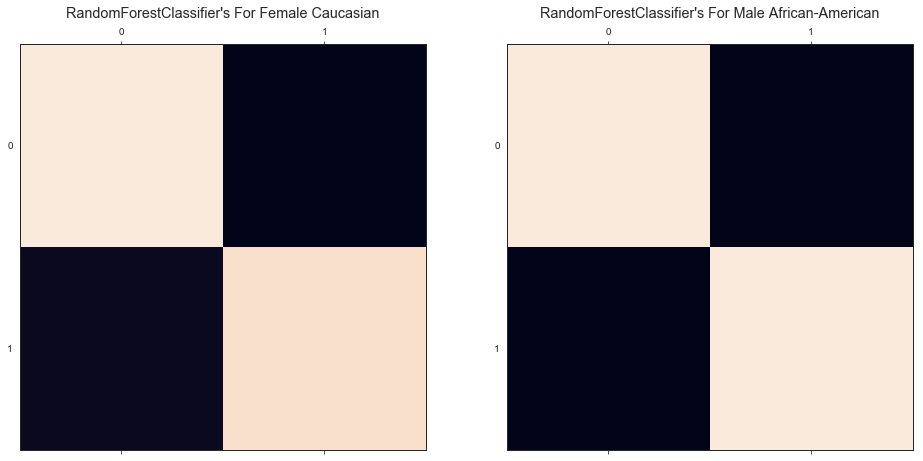

[[359  10]
 [  0  31]]
[[1273  117]
 [   2  412]]


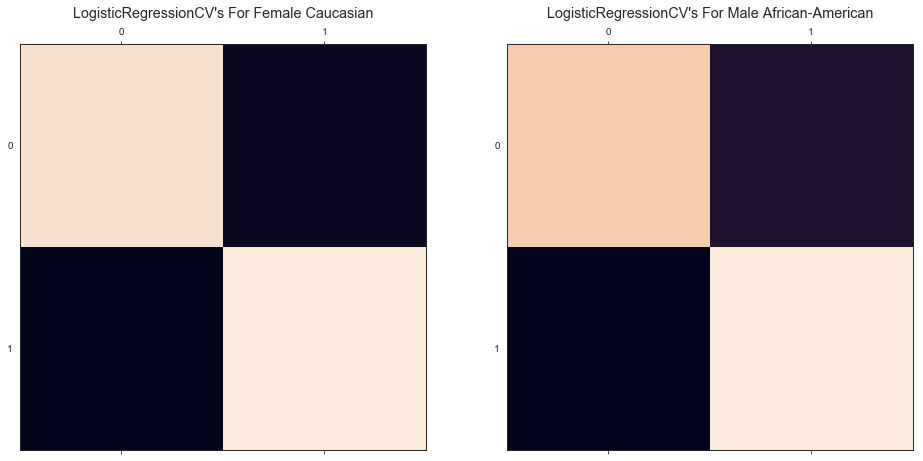

[[368   1]
 [ 22   9]]
[[1278  112]
 [   8  406]]


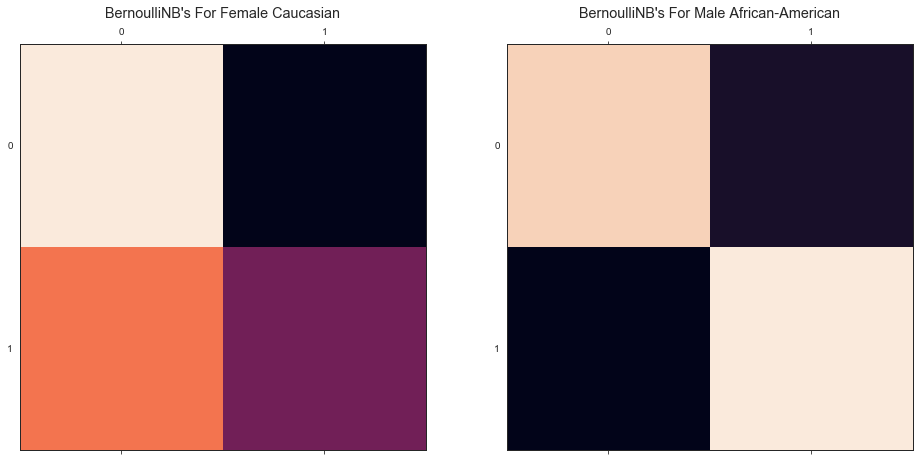

[[359  10]
 [  0  31]]
[[1273  117]
 [   6  408]]


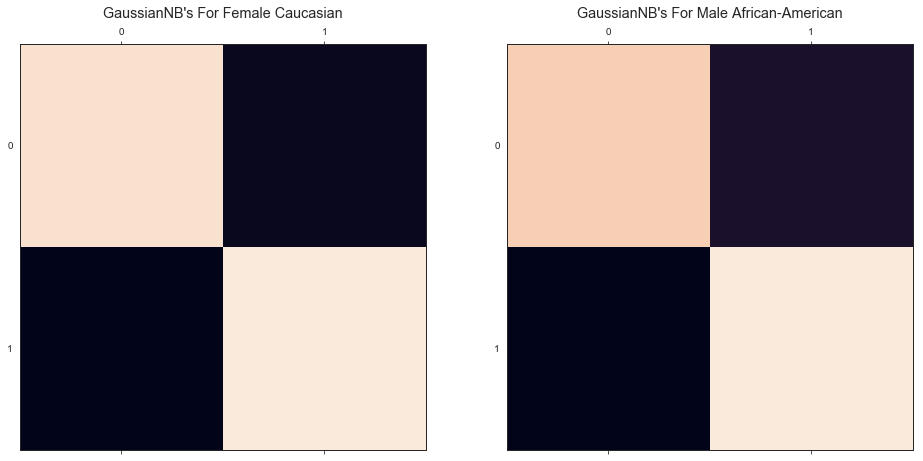

[[363   6]
 [ 24   7]]
[[1342   48]
 [ 258  156]]


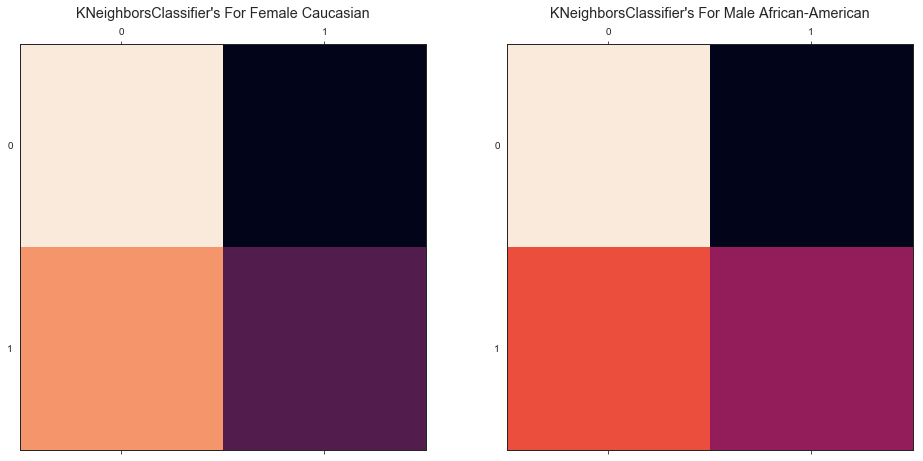

[[369   0]
 [ 14  17]]
[[1387    3]
 [ 116  298]]


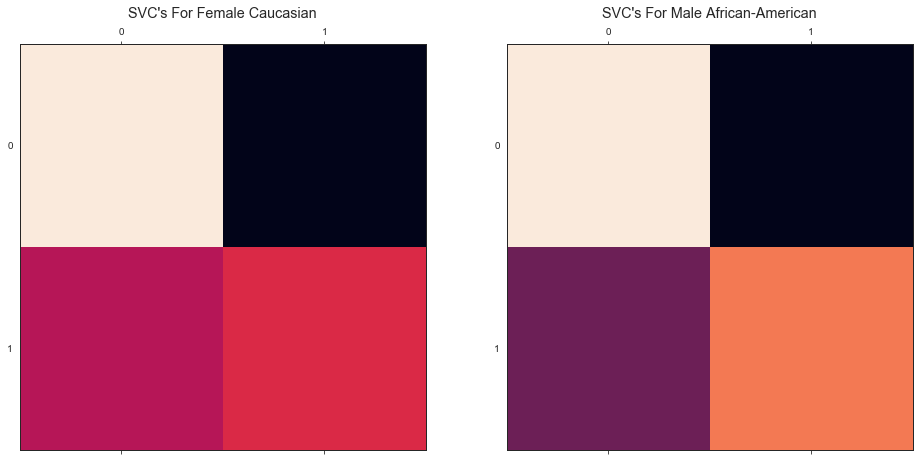

[[367   2]
 [ 16  15]]
[[1345   45]
 [ 245  169]]


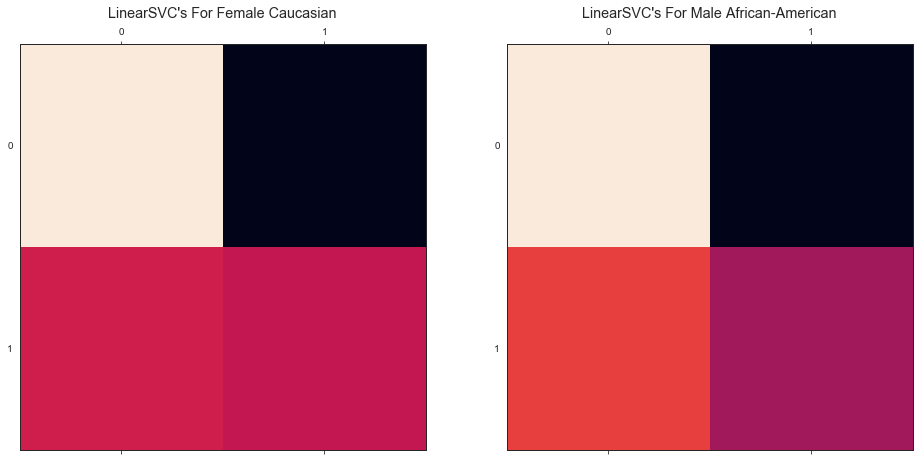

[[369   0]
 [  0  31]]
[[1390    0]
 [   1  413]]


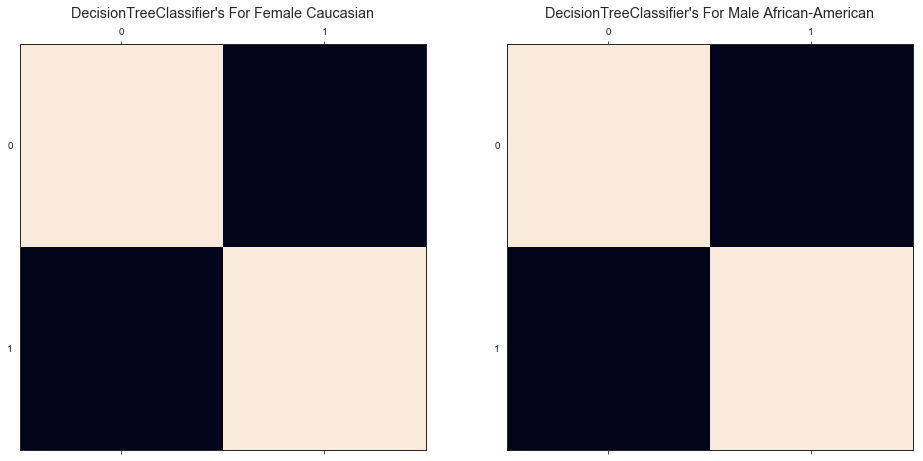

In [35]:
# pick candidate model to analysis its confusion matrix under two subgroups:
from sklearn.metrics import confusion_matrix
# caucassian women
data2 = data1[(data1['sex'] == 'Female') & (data1['race'] == 'Caucasian')]
actual2 = data2[Target]
# african_america men
data3 = data1[(data1['sex'] == 'Male') & (data1['race'] == 'African-American')]
actual3 = data3[Target]

for alg in MLA:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,12))
    pred = MLA_predict[alg.__class__.__name__].copy()
    pred = pred.loc[actual2.index.intersection(pred.index)]
    conf_mat = confusion_matrix(actual2, pred)
    print(conf_mat)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
#     ax = fig.add_subplot(211)
    cax = ax1.matshow(conf_mat, interpolation='nearest')
#     fig.colorbar(cax)
    ax1.set_title(alg.__class__.__name__ + '\'s For Female Caucasian')

    pred = MLA_predict[alg.__class__.__name__].copy()
    pred = pred.loc[actual3.index.intersection(pred.index)]
#     plt.subplot(1, 10, MLA.index(alg) + 1)
    conf_mat = confusion_matrix(actual3, pred)
    print(conf_mat)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
#     ax = fig.add_subplot(212)
    cax = ax2.matshow(conf_mat, interpolation='nearest')
#     fig.colorbar(cax)
    ax2.set_title(alg.__class__.__name__ + '\'s For Male African-American')
    plt.show()


Caucasian
RandomForestClassifier's DI score': 1.38498984390441
Caucasian
LogisticRegressionCV's DI score': 1.4689869766905268
Caucasian
BernoulliNB's DI score': 1.8343031670688472
Caucasian
GaussianNB's DI score': 1.4667461947221692
Caucasian
KNeighborsClassifier's DI score': 3.102169927530666
Caucasian
SVC's DI score': 1.7719797419604635
Caucasian
LinearSVC's DI score': 1.7955639454638503
Caucasian
DecisionTreeClassifier's DI score': 1.414531888211215


C:\Users\Lucy\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


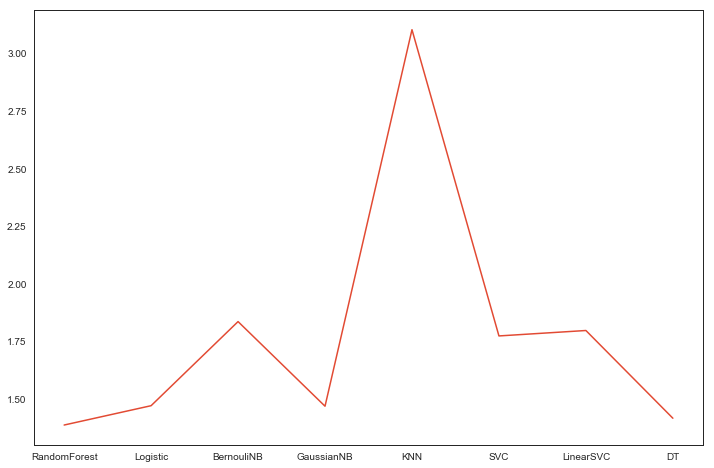

In [51]:
# calculate the DI score on baseline models
"""
Reference:
    Sorelle Friedler, Carlos Scheidegger, Suresh Venkatasubramanian, Sonam Choudhary, 
    Evan Hamilton and Derek Roth. 2018. "A comparative study of fairness-enhancing 
    interventions in machine learning. " arXiv:1802.04422v1 [stat.ML] 13 Feb 2018.
"""
def calc_prob_class_given_sensitive(predicted, sensitive, predicted_goal, sensitive_goal):
    """
    Returns P(predicted = predicted_goal | sensitive = sensitive_goal).  Assumes that predicted
    and sensitive have the same length.  If there are no attributes matching the given
    sensitive_goal, this will error.
    """
    match_count = 0.0
    total = 0.0
    for sens, pred in zip(sensitive, predicted):
        if str(sens) == str(sensitive_goal):
            total += 1
            if str(pred) == str(predicted_goal):
                match_count += 1

    return match_count / total


def calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name,
             unprotected_vals, positive_pred):
    """
    :param actual: label
    :param predicted: prediction
    :param dict_of_sensitive_lists: samples
    :param single_sensitive_name: focus on which feature, here is race
    :param unprotected_vals: ['African-American', 'Caucasian']
    :param positive_pred: 1, means that person has recid in two years
    """
    sensitive = dict_of_sensitive_lists[single_sensitive_name]  # only look at sample of feature "race"
    sensitive_values = list(set(sensitive))
    # the list is ['Other', 'Hispanic', 'African-American', 'Asian', 'Native American', 'Caucasian']
    
    if len(sensitive_values) <= 1:
         print("ERROR: Attempted to calculate DI without enough sensitive values:" + \
               str(sensitive_values))
         return 1.0

    # this list should only have one item in it
    what_is_this = [val for val in sensitive_values if val in unprotected_vals]
    # ['African-American', 'Caucasian']
    single_unprotected = [val for val in sensitive_values if val in unprotected_vals][0]
    print(single_unprotected)
    # single_unprotected becomes only 'African-American'. Something wrong?
    unprotected_prob = calc_prob_class_given_sensitive(predicted, sensitive, positive_pred,
                                                       single_unprotected)

    sensitive_values.remove(single_unprotected)
    total = 0.0
    for sens in sensitive_values:
         pos_prob = calc_prob_class_given_sensitive(predicted, sensitive, positive_pred, sens)
         DI = 0.0
         if unprotected_prob > 0:
             DI = pos_prob / unprotected_prob
         if unprotected_prob == 0.0 and pos_prob == 0.0:
             DI = 1.0
         total += DI

    if total == 0.0:
         return 1.0

    return total / len(sensitive_values)

actual = data1[Target]
dict_of_sensitive_lists = data1
single_sensitive_name = 'race'
# unprotected_vals = ['African-American', 'Caucasian']
unprotected_vals = ['Caucasian']
positive_pred = 1
DI_res = []
# x_axis = ['GradientBoost', 'RandomForest', 'GaussianPro', 'Logistic', 'BernouliNB', 'GaussianNB', 'KNN', 'SVC', 'Linear', 'DT']
x_axis = ['RandomForest', 'Logistic', 'BernouliNB', 'GaussianNB', 'KNN', 'SVC', 'LinearSVC', 'DT']
for alg in MLA:
    predicted = MLA_predict[alg.__class__.__name__]
    score = calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name, unprotected_vals, positive_pred)
    DI_res.append(score)
    print(alg.__class__.__name__ + "'s DI score': " + str(score))
# plot
plt.plot(x_axis, DI_res)
plt.show()

In [47]:
"""
References:
    .. [1] M. Feldman, S. A. Friedler, J. Moeller, C. Scheidegger, and
       S. Venkatasubramanian, "Certifying and removing disparate impact."
       ACM SIGKDD International Conference on Knowledge Discovery and Data
       Mining, 2015.
"""
# Run Feldman to repair our data set: repaired feature = sex, race
from BlackBoxAuditing.repairers.GeneralRepairer import Repairer
all_data = data1.values.tolist()
feature_list = data1.keys().to_list()
feature_to_repair = feature_list.index('sex')
repairer = Repairer(all_data, feature_to_repair, 1.0, False)
# repair level: 1.0, kdd=False
# if kdd, then do CategoricRepairer
# it is string, so use CategoricRepairer
repaired_sex_data = repairer.repair(all_data)
feature_to_repair = feature_list.index('race')
repairer = Repairer(repaired_sex_data, feature_to_repair, 1.0, False)
repaired_data = repairer.repair(repaired_sex_data)
print(repaired_data)

[['Male', 58, 'Greater than 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'F', 'arrest case no charge', 0, 'Low', 'Low', 0, 0, 0, 2, 0, 25, 0, 0], ['Male', 36, '25 - 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'M', 'arrest case no charge', 1, 'Low', 'Low', 1, 0, 0, 2, 0, 113, 0, 0], ['Male', 25, 'Less than 25', 'African-American', 0, 8, 0, 1, 2, 10.0, 'M', 'arrest case no charge', 0, 'High', 'Medium', 0, 0, 2, 2, 0, 200, 0, 2], ['Male', 36, '25 - 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'M', 'Uttering a Forged Instrument', 0, 'Low', 'Low', 0, 0, 0, 2, 0, 293, 0, 0], ['Male', 36, '25 - 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'M', 'Battery', 0, 'Low', 'Low', 0, 0, 0, 2, 1, 25, 0, 0], ['Male', 36, '25 - 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'F', 'arrest case no charge', 0, 'Low', 'Low', 0, 0, 0, 2, 0, 293, 0, 0], ['Male', 36, '25 - 45', 'African-American', 0, 2, 0, 1, 2, 10.0, 'M', 'Battery', 0, 'Low', 'Medium', 0, 0, 0, 2, 1, 25, 0, 0], ['Male', 25, 'Less than 25', '

In [48]:
# convert repaired_data (list) ro df
repaired_df = pd.DataFrame(repaired_data, columns=feature_list)
print(repaired_df.info())
repaired_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   4743 non-null   object 
 1   age                   4743 non-null   int64  
 2   age_cat               4743 non-null   object 
 3   race                  4743 non-null   object 
 4   juv_fel_count         4743 non-null   int64  
 5   decile_score          4743 non-null   int64  
 6   juv_misd_count        4743 non-null   int64  
 7   juv_other_count       4743 non-null   int64  
 8   priors_count          4743 non-null   int64  
 9   c_days_from_compas    4743 non-null   float64
 10  c_charge_degree       4743 non-null   object 
 11  c_charge_desc         4743 non-null   object 
 12  is_recid              4743 non-null   int64  
 13  score_text            4743 non-null   object 
 14  v_score_text          4743 non-null   object 
 15  two_year_recid       

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_days_from_compas,...,score_text,v_score_text,two_year_recid,sex_code,age_cat_code,race_code,c_charge_degree_code,c_charge_desc_code,score_text_code,v_score_text_code
3898,Male,36,25 - 45,African-American,0,2,0,1,2,10.0,...,Low,Low,0,0,0,2,0,25,0,0
913,Male,25,25 - 45,African-American,0,2,0,1,2,10.0,...,Low,Low,0,0,0,2,0,113,0,0
2322,Male,25,25 - 45,African-American,0,2,0,1,2,10.0,...,Medium,Low,0,0,0,2,1,25,2,0
2606,Male,25,25 - 45,African-American,0,2,0,1,2,10.0,...,Low,Low,0,0,0,2,1,113,0,0
3579,Male,36,25 - 45,African-American,0,2,0,1,2,147.0,...,Low,Low,0,0,0,2,0,293,0,0
4612,Male,25,25 - 45,African-American,0,8,0,1,2,10.0,...,Low,Medium,0,0,0,2,0,200,0,2
4561,Male,25,25 - 45,African-American,0,2,0,1,2,10.0,...,Low,Low,1,0,0,2,1,25,0,0
1813,Male,36,25 - 45,African-American,0,8,0,1,7,10.0,...,Low,Low,1,0,0,2,0,200,0,0
2128,Male,36,Greater than 45,African-American,0,8,0,1,2,10.0,...,Low,Low,1,0,0,2,0,293,0,0
0,Male,58,Greater than 45,African-American,0,2,0,1,2,10.0,...,Low,Low,0,0,0,2,0,25,0,0


Text(0.5, 1.0, 'sex vs score_text_code two_year_recid Comparison')

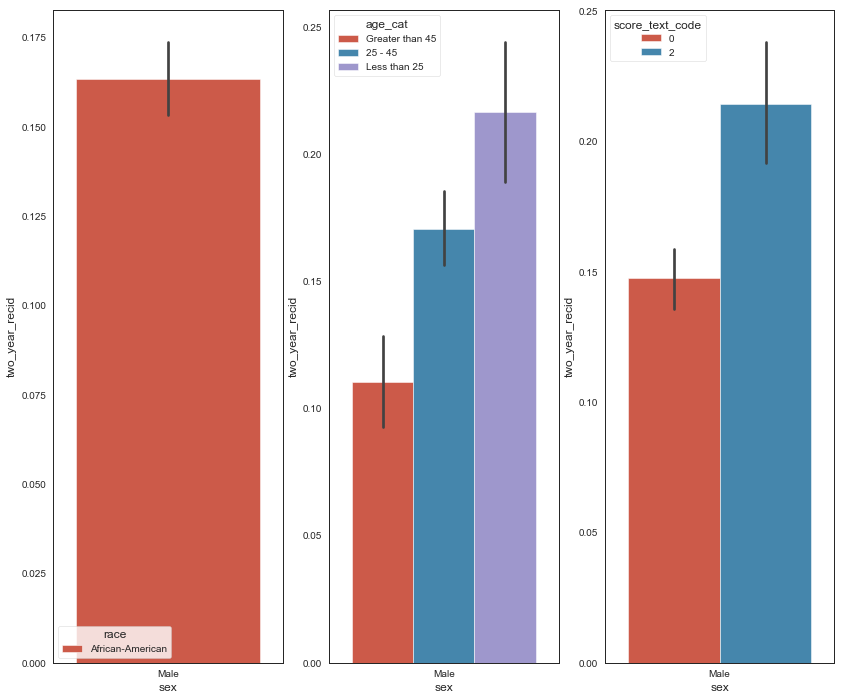

In [53]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'race', data=repaired_df, ax = qaxis[0])
axis1.set_title('sex vs race two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'age_cat', data=repaired_df, ax  = qaxis[1])
axis1.set_title('sex vs age_cat two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'score_text_code', data=repaired_df, ax  = qaxis[2])
axis1.set_title('sex vs score_text_code two_year_recid Comparison')

# repair makes all male, and all african-american

In [49]:
# create table to compare metrics after repair
MLA_compare_after = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict_after = repaired_df[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare_after.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare_after.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, repaired_df[data1_x_calc], repaired_df[Target], cv  = cv_split, return_train_score=True)

    MLA_compare_after.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare_after.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare_after.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare_after.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(repaired_df[data1_x_calc], repaired_df[Target])
    MLA_predict_after[MLA_name] = alg.predict(repaired_df[data1_x_calc])
    
    row_index+=1

    
#print and sort table:
MLA_compare_after.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare_after

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increas

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lucy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922:

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
1,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.953462,0.953408,0.0125452,1.49709
2,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.953427,0.953408,0.0125452,0.00518582
3,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.953427,0.953408,0.0125452,0.0051857
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.964148,0.9409,0.0159014,0.0216483
7,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.964886,0.934364,0.0110837,0.00418611
5,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.937012,0.924455,0.015528,1.22811
6,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.913357,0.915671,0.110725,0.213032
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.93406,0.906114,0.0268035,0.00927315


Caucasian
RandomForestClassifier's DI score': 1.508547443917977
Caucasian
LogisticRegressionCV's DI score': 1.4701073676747058
Caucasian
BernoulliNB's DI score': 1.4701073676747058
Caucasian
GaussianNB's DI score': 1.4701073676747058
Caucasian
KNeighborsClassifier's DI score': 1.5448534642799776
Caucasian
SVC's DI score': 1.7098921159437406
Caucasian
LinearSVC's DI score': 1.574166824152807
Caucasian
DecisionTreeClassifier's DI score': 1.553491343606592


C:\Users\Lucy\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


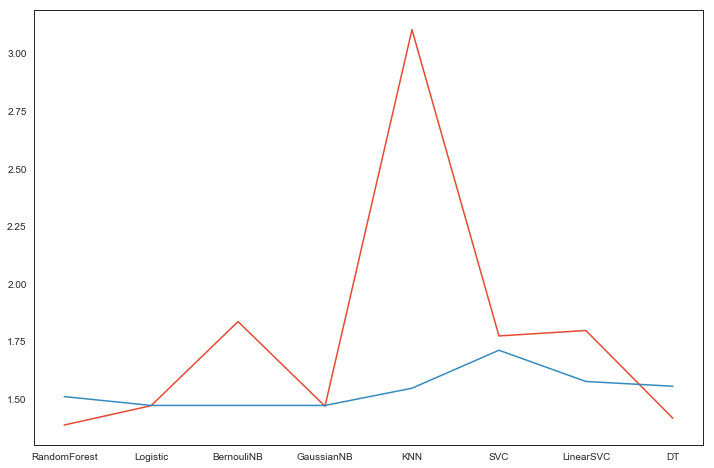

In [52]:
# calculate the DIavgall again
actual = data1[Target]
dict_of_sensitive_lists = data1
single_sensitive_name = 'race'
# unprotected_vals = ['African-American', 'Caucasian']
unprotected_vals = ['Caucasian']
positive_pred = 1
DI_res_repaired = []
for alg in MLA:
    predicted = MLA_predict_after[alg.__class__.__name__]
    score = calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name, unprotected_vals, positive_pred)
    DI_res_repaired.append(score)
    print(alg.__class__.__name__ + "'s DI score': " + str(score))

# plot
plt.plot(x_axis, DI_res, DI_res_repaired)
plt.show()

# the current DI calculation looks skecthy, looking for calibration (group condition)